In [1]:
import pandas as pd
import numpy as np

### <center> К Ближайших Соседей (K Nearest Neigbours)

Метод ближайших соседей (k Nearest Neighbors, или kNN) — тоже очень популярный метод классификации, также иногда используемый в задачах регрессии. Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. Формально основой метода является гипотеза компактности: если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных.

Согласно методу ближайших соседей, тестовый пример (зеленый шарик) будет отнесен к классу "синие", а не "красные".
<img src=https://hsto.org/files/4b8/000/4ab/4b80004ab2414944802677e2e1cb1b76.png>

Например, если не знаешь, какой тип товара указать в объявлении для Bluetooth-гарнитуры, можешь найти 5 похожих гарнитур, и если 4 из них отнесены к категории "Аксессуары", и только один — к категории "Техника", то здравый смысл подскажет для своего объявления тоже указать категорию "Аксессуары".
Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:

1. Вычислить расстояние до каждого из объектов обучающей выборки
2. Отобрать **k** объектов обучающей выборки, расстояние до которых минимально
3. Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди **k** ближайших соседей

Под задачу **регрессии** метод адаптируется довольно легко – на **3** шаге возвращается **не метка**, а **число – среднее (или медианное) значение целевого признака среди соседей.**
Примечательное свойство такого подхода – его **ленивость**. Это значит, что вычисления начинаются только в момент классификации тестового примера, а заранее, только при наличии обучающих примеров, никакая модель не строится. В этом отличие, например, от логистической регрессии, где сначала на основе обучающей выборки находятся коэффициенты уравнения, а потом относительно быстро происходит классификация тестовых примеров. 

**Параметры модели:**
- число соседей
- метрика расстояния между объектами (часто используются метрика Хэмминга, евклидово расстояние, косинусное расстояние и расстояние Минковского). Отметим, что при использовании большинства метрик значения признаков надо масштабировать. Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, чем "Возраст" со значениями до 100.
- веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

**Основные параметры класса sklearn.neighbors.KNeighborsClassifier:**
- weights: "uniform" (все веса равны), "distance" (вес обратно пропорционален расстоянию до тестового примера) или другая определенная пользователем функция
- algorithm (опционально): "brute", "ball_tree", "KD_tree", или "auto". В первом случае ближайшие соседи для каждого тестового примера считаются перебором обучающей выборки. Во втором и третьем — расстояние между примерами хранятся в дереве, что ускоряет нахождение ближайших соседей. В случае указания параметра "auto" подходящий способ нахождения соседей будет выбран автоматически на основе обучающей выборки.
- metric: "minkowski", "manhattan", "euclidean", "chebyshev" и другие

Метрики:
 $$d_{евклидово} = \sqrt{\sum_{i=1}^n(x_{i} - y_{i})^2}$$
 $$d_{манхэттенское} = \sum_{i=1}^n|x_{i} - y_{i}|$$
 $$d_{Минковского} = (\sum_{i=1}^n|x_{i} - y_{i}|^p)^{1/p}$$
- Косинусный коэффициент. Может применяться между двумя вещественными векторами и и принимать значение в диапазоне от –1 (абсолютная противоположность) до 1 (абсолютное совпадение) с промежуточным значением 0, говорящим об отсутствии зависимости. Вспомните определение:
$$(\overrightarrow{x},\overrightarrow{y}) = \frac{\overrightarrow{x}\cdot\overrightarrow{y}}{||\overrightarrow{x}|| ||\overrightarrow{y}||}$$
- Расстояние Жаккара, или подобие. Это уравнение вычисляет расстояние между наборами объектов, например списком друзей Кэти — A = {Kahn, Mark, Laura...} и Рэйчел — B = {Mladen, Kahn, Mark...}, и говорит, насколько близки эти два набора:
$$J(A,B) = \frac{|A\cap B|}{|A\cup B|}$$
- Расстояние Хемминга. Может служить для поиска расстояния между двумя строками либо парами слов или последовательностями ДНК одинаковой длины. Расстояние между словами olive и ocean равно 4, так как все буквы, за исключением «o», отличаются. Расстояние между словами shoe и hose равно 3, поскольку все буквы, кроме «e», отличаются. Вы выполняете проход по всем позициям для сличения букв, и если в проходимой позиции они отличаются, то увеличиваете получившееся значение на 1
- Другие меры расстояния смотрите: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric

In [42]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_boston

from sklearn.preprocessing import  StandardScaler
from sklearn.preprocessing import Binarizer, KBinsDiscretizer
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [41]:
"""Грузим данные"""
boston = load_boston()
features = boston.data
target = boston.target
features_name = boston.feature_names

"""Делаем стандартизированные признаки"""
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

"""Создаем таргет для бинарной классификации"""
threshold = (target.max() - target.min())/2
target_2 = Binarizer(threshold=threshold).fit_transform(target.reshape(-1, 1)).flatten()

"""Создаем таргет для мультиклассификации"""
target_3 = KBinsDiscretizer(n_bins=3, encode='ordinal').fit_transform(target.reshape(-1,1)).flatten()

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Решаем задачу регрессии

**Решение "влоб"**

In [45]:
knn_r = KNeighborsRegressor()
model = knn_r.fit(features, target)
cross_val_score(knn_r, X=features, y=target, cv=kf, scoring="r2").mean()

0.5383871944766712

**Стандартизируем признаки**

In [46]:
knn_r = KNeighborsRegressor()
model = knn_r.fit(features_standardized, target)
cross_val_score(knn_r, X=features_standardized, y=target, cv=kf, scoring="r2").mean()

0.7467630955402731

### Решаем задачу классификации
**Решение "влоб"**

In [47]:
knn_clf = KNeighborsClassifier()
model = knn_clf.fit(features, target_2)
cross_val_score(knn_clf, X=features, y=target_2, cv=kf, scoring="f1").mean()

0.7322038905669626

**Стандартизируем признаки**

In [48]:
knn_clf = KNeighborsClassifier()
model = knn_clf.fit(features_standardized, target_2)
cross_val_score(knn_clf, X=features_standardized, y=target_2, cv=kf, scoring="f1").mean()

0.8286616586593409

### <center> Наивный Байесовский Классификатор (Naive Bayes)

### Теорема Байеса

Для понимания тогоя, как работает Байесовский классификатор, вспомним ***теорему Байеса об условной вероятности***. 

**Основная идея теоремы Байеса** состоит в том, чтобы получить большую точность оценки вероятности события путем учета дополнительных данных.

**Принцип прост:** есть ***первоначальная (априорная)*** оценка вероятности, которую уточняют c получением дополнительной информации, получая в итоге ***апостериорную вероятность***.

**Пример:**

Для лучшего понимания рассмотрим пример. На склад поступило две партии изделий, в первой - 40 изделий, во второй - 60. Известно, что в первой партии 50% брака, а во второй - только 10%. Наугад взятое изделие оказалось с браком. Какова вероятность того, что это изделие было из первой партии?

Первоначальная вероятность наугад взять изделие из второй партии выше, чем из первой:

$$P(2 партия) = \frac{60}{100} = 0.6  >  P(1 партия) = \frac{40}{100} = 0.4 $$

**НО!** Тот факт, что у нас появилась дополнительная информация о том, что изделие с браком, меняет дело! В первой партии бракованых изделий больше (20 из 40), чем во второй (только 6 из 60). Это сильно повышает вероятность того, что выбрано изделие именно из 1-й партии. 


Прежде чем представить формулу Байеса вспомним некоторые обозначения: 
 - **A** и **B** - события
 - **p(A)** и **p(B)** - вероятности наступления каждого события
 - **p(A|B)** - условная вероятность: вероятность наступления события  **A** при условии, что произошло событие **B**
 
 Тогра, формула условной вероятности Байеса:
 
 $$P(A|B) = \frac{P(B|A) * P(A)}{P(B)}$$
 
 Ответим на ворпос задания -  рассчитаем  вероятность того, что выбранное наугад изделие извлечено из 1-й партии, при условии, что оно - с браком:
 
 $$P(1 партия|брак) = \frac{P(брак|1 партия) * P(1 партия)}{P(брак)} = \frac{0.5 * 0.4}{0.5*0.4 + 0.1*0.6} = 0.77 $$
 

Как видим, дополнительная информация о том, что деталь бракованная, позволила существенно повысить вероятность того, что она из первой партии -  с 0.4 до 0.77


Именно формула условной вероятности Байеса лежит в основе Байесовского классификатора. Его активно применяли для создания фильтра от спама для электронной почты. Логика здесь проста: наличие определенный слов в письме может сильно повысить шансы того, что оно является спамом. 

### Байесовский Классификатор 

Пусть мы хотим обучить классификатор, который по некоторым параметрам авто (цвет, тип и страна происзодства) будет предсказывать, украдут его или нет. Пример данных для обучения:

<img src="https://github.com/MalikaL17/course_materials/blob/main/img/Bayes_1.PNG?raw=true">

По сути, Байесовский классификатор представляет собой вероятностную модель. Немного перепишем формулу Байеса, заменив А и В на **y** и **Х**, где **y** - целевая переменная, которую предсказываем (метка класса), а **X** - матрица признаков:

 $$P(y|X) = \frac{P(X|y)  P(y)}{P(X)}$$
 
Матрица признаков X состоит из нескольких признаков, то есть $ X = (x_1, x_2, ... x_n) $. Тогда формулу можно записать так: 
     $$P(y|x_1, x_2...x_n) = \frac{P(x_1|y)  P(x_2|y) ... P(x_n|y) P(y)}{P(x_1)  P(x_2)...P(x_n) }$$

**Апостериорная вероятность P(y|X)** высчитывается так: сначала создаётся **частотная таблица** для каждого параметра относительно искомого результата. Затем из частотных таблиц формируются **таблицы правдоподобия**, после чего с помощью уравнения Байеса высчитывается апостериорная вероятность для каждого класса. 

***Класс с наибольшей апостериорной вероятностью и будет прогнозируемым результатом.***

Ниже приведены частотные таблицы и таблицы правдоподобия для всех трёх предикторов.
<img src = "https://github.com/MalikaL17/course_materials/blob/main/img/Bayes_2.PNG?raw=true">


Допустим, мы хотим сделать прогноз для авто с такими параметрами: *Color* - *Red*, *Type* - *SUV*, *Origin* - *Domestic*. Расчитаем апостериорные вероятности для каждого класса:

$$P(Yes|X) = \frac{P(Red|Yes)*P(SUV|Yes)*P(Domestic|Yes)*P(Yes)}{P(X)}$$

$$P(No|X) = \frac{P(Red|No)*P(SUV|No)*P(Domestic|No)*P(No)}{P(X)}$$

Т.к. знаменатели в рассчетах каждого класса совпадают, можно сравнивать только числители.

$$P(Yes|X) = P(Red|Yes)*P(SUV|Yes)*P(Domestic|Yes)*P(Yes) = \frac{3}{5}*\frac{1}{5}*\frac{2}{5}*\frac{1}{2} = 0.024 $$

$$P(No|X) = P(Red|No)*P(SUV|No)*P(Domestic|No)*P(No) = \frac{2}{5}*\frac{3}{5}*\frac{3}{5}*\frac{1}{2} = 0.072 $$

Т.к **0.072 > 0.024**, ответом классификатора будет **No**

### Преимущества
1. Высокая скорость обучения из-за вычислительной простоты, т.к. рассчитываются только частоты и на их основе вероятности
2. Вычисления занимают мало оперативной памяти 
3. Вытекает из первых двух пунктов - эффективнее на больших объемах данных, где обучение даже линейных моделей может занять много времени
4. Не нужна нормализация данных


### Почему Байесовский классификатор называют "наивным"?

"Наивность" заключается в том предположении, что все признаки независимы, что сложно выполняется на практике. Например, среди спортивных авто могут преобладать машины определенных цветов или страны производителя. Это условие невозможно выполнить при работе с текстами, ведь в предложениях вероятности слов сильно зависят от контекста. Однако, это не помешало алгоритму хорошо справляться с выявлением спама.  

### Отравление Байеса

Так шуточно называется метод обхода фильтра спама на основе теоремы Байеса. Зная принцип работы алгоритма, спамеры стали намеренно добавлять в спам-письма слова, которые редко встречаются в спаме. Это позволяло, с одной стороны, обойти фильтрацию спама, а с другой, "обмануть" фильтр и заставить его отправлять в спам хорошие письма, потому что пользователь, который настраивает свой фильтр спама на зараженное сообщение, будет указывать фильтру, что слова, добавленные спамером, являются хорошим признаком спама.

### Реализация в sklearn

В sklearn реализованы 3 виде Наивных Байеса:
- **GaussianNB** - можно применить к любым непрерывным данным
- **BernoulliNB** -  принимает бинарные данные
- **MultinomialNB** - принимает целочисленные данные
**MultinomialNB** и **BernoulliNB** в основном применяют для классификации текстовых данных.

**BernoulliNB** подсчитывает ненулевые частоты признаков по каждому классу. **MultinomialNB** принимает в расчет среднее значение каждого признака для каждого класса, в то время как **GaussianNB** записывает среднее значение, а также стандартное отклонение каждого признака для каждого класса.

Кроме того, в реализации sklearn **MultinomialNB** и **BernoulliNB** умеют работать с разреженными матрицами, а  **GaussianNB** - нет.

In [34]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.datasets import fetch_20newsgroups_vectorized
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score, confusion_matrix

Посмотрим работу алгоритма на наборе данных с новостями. 

In [17]:
data = fetch_20newsgroups_vectorized(subset='train', return_X_y=False)
X, y, target_names = data.data, data.target, data.target_names
X_test, y_test = fetch_20newsgroups_vectorized(subset='test', return_X_y=True)

В В датасете 20 классов - 20 категорий новостей

In [18]:
for i, name in enumerate(target_names):
    print(f"{i}\t{name}")

0	alt.atheism
1	comp.graphics
2	comp.os.ms-windows.misc
3	comp.sys.ibm.pc.hardware
4	comp.sys.mac.hardware
5	comp.windows.x
6	misc.forsale
7	rec.autos
8	rec.motorcycles
9	rec.sport.baseball
10	rec.sport.hockey
11	sci.crypt
12	sci.electronics
13	sci.med
14	sci.space
15	soc.religion.christian
16	talk.politics.guns
17	talk.politics.mideast
18	talk.politics.misc
19	talk.religion.misc


In [23]:
X.shape

(11314, 130107)

In [19]:
X[0]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 340 stored elements in Compressed Sparse Row format>

In [20]:
X[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [21]:
X[0].toarray().shape

(1, 130107)

### 1. GausianNB

**GausianNB** не умеет работать с разреженными матрицами, а после перевода разреженной матрицы в обычную, она занимает лишком много места в памяти. Поэтому обучать модель будет на порциях данных - батчах

In [24]:
gnb = GaussianNB()
batch = 500
for i in range(0, X.shape[0], batch):
    gnb.partial_fit(X[i: i + batch].toarray(), y[i: i + batch], classes=y)

In [27]:
predict = np.array([])
for  i in range(0, X_test.shape[0], batch):
    predict = np.hstack((predict, gnb.predict(X_test[i: i + batch].toarray())))

In [30]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       319
           1       0.55      0.56      0.56       389
           2       0.51      0.43      0.47       394
           3       0.60      0.57      0.58       392
           4       0.75      0.62      0.68       385
           5       0.67      0.65      0.66       395
           6       0.64      0.56      0.60       390
           7       0.84      0.79      0.82       396
           8       0.88      0.89      0.89       398
           9       0.94      0.82      0.87       397
          10       0.87      0.94      0.90       399
          11       0.74      0.83      0.78       396
          12       0.65      0.60      0.62       393
          13       0.61      0.79      0.69       396
          14       0.71      0.82      0.76       394
          15       0.80      0.86      0.83       398
          16       0.73      0.80      0.77       364
          17       0.88    

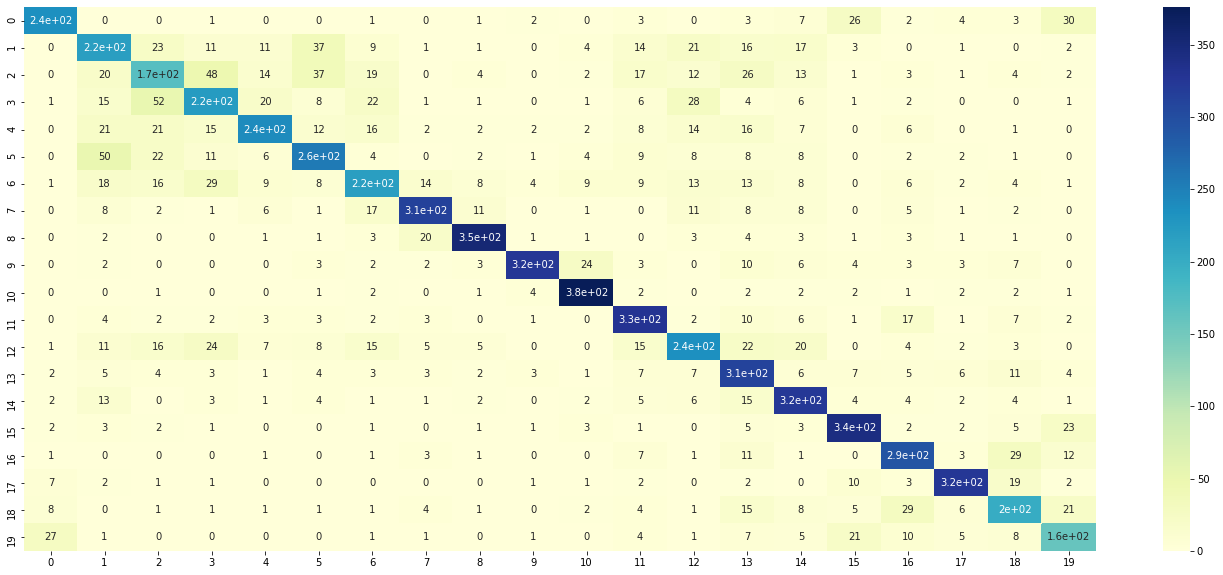

In [35]:
plt.figure(figsize=(24,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cmap="YlGnBu", cbar=True);

In [36]:
for i, name in enumerate(target_names):
    print(f"{i}\t{name}")

0	alt.atheism
1	comp.graphics
2	comp.os.ms-windows.misc
3	comp.sys.ibm.pc.hardware
4	comp.sys.mac.hardware
5	comp.windows.x
6	misc.forsale
7	rec.autos
8	rec.motorcycles
9	rec.sport.baseball
10	rec.sport.hockey
11	sci.crypt
12	sci.electronics
13	sci.med
14	sci.space
15	soc.religion.christian
16	talk.politics.guns
17	talk.politics.mideast
18	talk.politics.misc
19	talk.religion.misc


### 2. MultinomialNB

              precision    recall  f1-score   support

           0       0.85      0.24      0.37       319
           1       0.71      0.60      0.65       389
           2       0.79      0.65      0.71       394
           3       0.63      0.75      0.69       392
           4       0.86      0.68      0.76       385
           5       0.88      0.68      0.77       395
           6       0.90      0.72      0.80       390
           7       0.71      0.92      0.80       396
           8       0.84      0.91      0.87       398
           9       0.86      0.85      0.86       397
          10       0.90      0.93      0.91       399
          11       0.52      0.96      0.67       396
          12       0.78      0.52      0.63       393
          13       0.82      0.76      0.79       396
          14       0.83      0.81      0.82       394
          15       0.34      0.98      0.51       398
          16       0.66      0.80      0.73       364
          17       0.96    

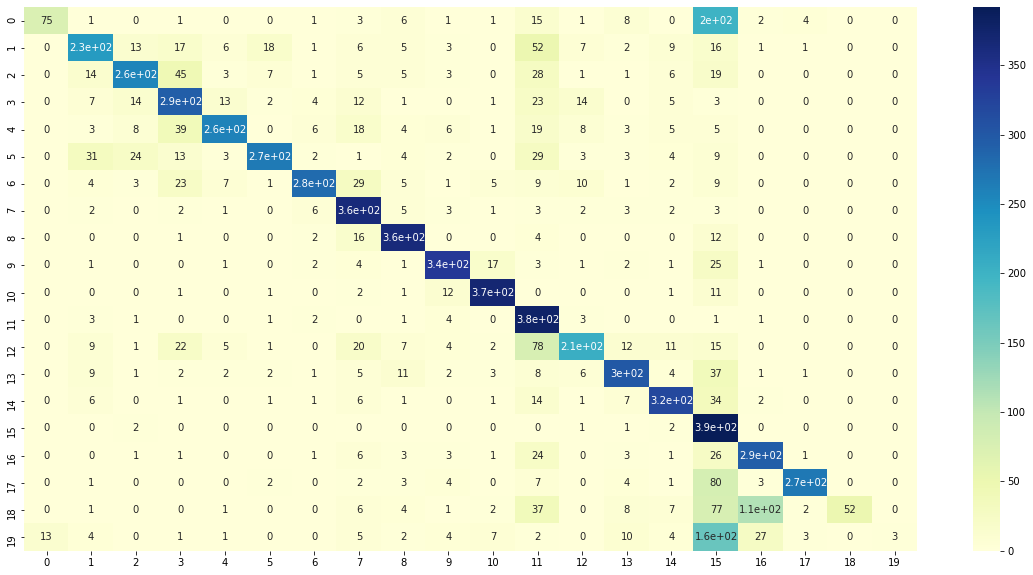

In [37]:
gnb = MultinomialNB()
batch = 200
gnb.fit(X, y)
predict = gnb.predict(X_test)
print(classification_report(y_test, predict))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cmap="YlGnBu", cbar=True);

### 3. BernoulliNB

              precision    recall  f1-score   support

           0       0.92      0.32      0.47       319
           1       0.58      0.63      0.61       389
           2       0.33      0.01      0.01       394
           3       0.43      0.81      0.56       392
           4       0.64      0.76      0.70       385
           5       0.84      0.61      0.70       395
           6       0.30      0.93      0.45       390
           7       0.67      0.78      0.72       396
           8       0.74      0.91      0.82       398
           9       0.77      0.87      0.82       397
          10       0.99      0.83      0.90       399
          11       0.82      0.69      0.75       396
          12       0.57      0.67      0.62       393
          13       0.84      0.52      0.64       396
          14       0.88      0.68      0.77       394
          15       0.53      0.80      0.64       398
          16       0.74      0.57      0.64       364
          17       0.96    

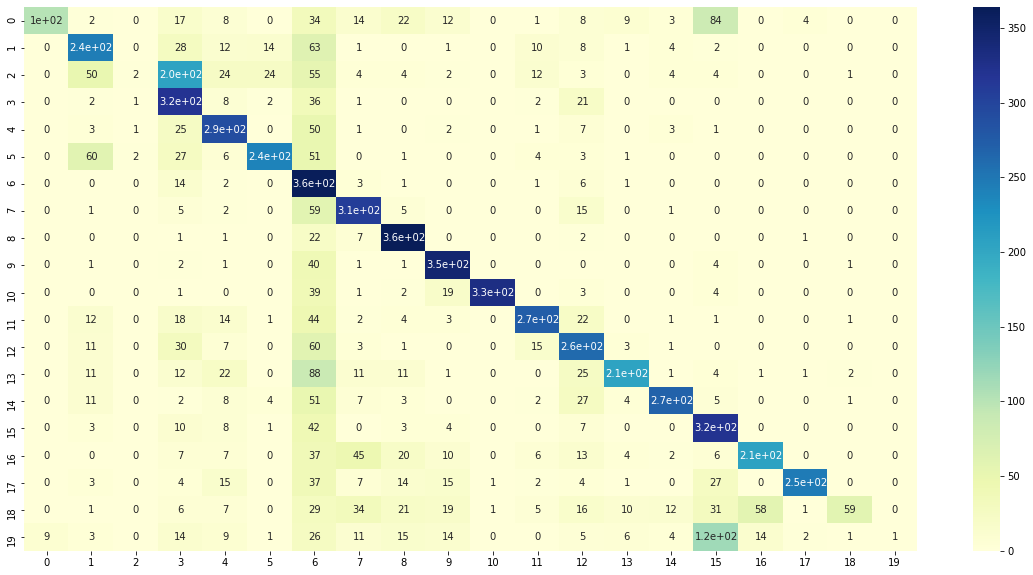

In [38]:
gnb = BernoulliNB()
batch = 200
gnb.fit(X, y)
predict = gnb.predict(X_test)
print(classification_report(y_test, predict))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, cmap="YlGnBu", cbar=True);